Census Income Project
Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight) The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Loding The DataSet

In [2]:
ds=pd.read_csv('census_income.csv')
ds.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


top 5 head of the dataset

In [3]:
ds.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Bottom 5 of the dataset

In [4]:
ds.shape

(32560, 15)

# Checking Types Of Data

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


6 integer data type columns and 9 object data type columns present in the dataset

# Checking Null Values

In [7]:
ds.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values present in the dataset

<AxesSubplot:>

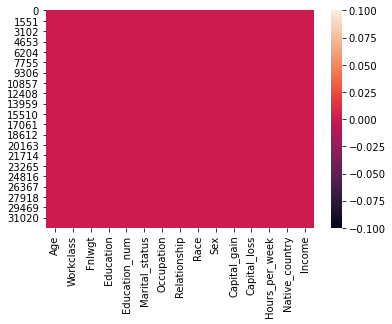

In [8]:
# checking null values through heatmap
sns.heatmap(ds.isnull())

# Exploratory data Analysis for categorical data

In [10]:
ds.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


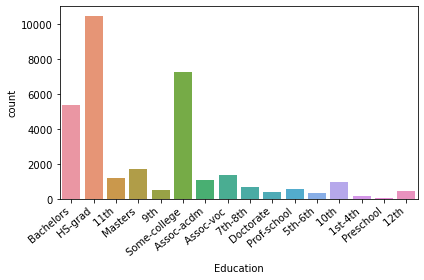

In [11]:
ax=sns.countplot(x='Education',data=ds)
print(ds['Education'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Most of the people are HS-grad and are maximum in number that is 10501.very few peoples(51)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


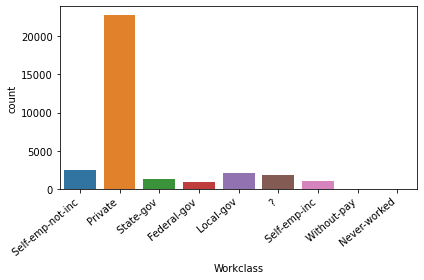

In [12]:
ax=sns.countplot(x='Workclass',data=ds)
print(ds['Workclass'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

peoples working in private comanies are maximum in number is 22696, other than that 'self-emp-not-in','?',Local-gov, selfempy inc and Federal- gov are looking almost equal in plot

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


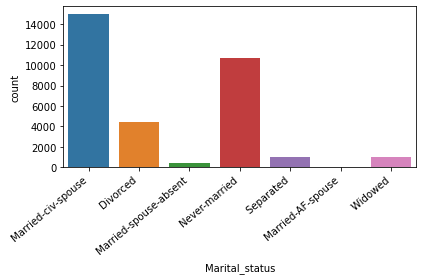

In [14]:
ax=sns.countplot(x='Marital_status',data=ds)
print(ds['Marital_status'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Married-civ-spouse are maximum in number that is 14976, Naver-married peoples are 10682 and Divorced are443.Married-AF-Spose are very few in number that is 23

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


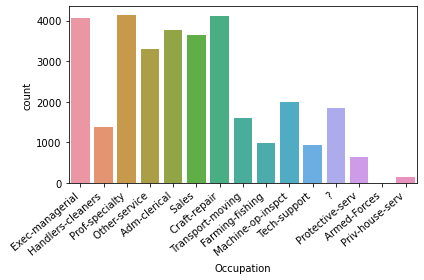

In [16]:
ax=sns.countplot(x='Occupation',data=ds)
print(ds['Occupation'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Prof-specialty,Craft-repair,Exec-managerial and-clerical,Sales,Other-service are almost equal in number and countplot is showing almost equally distributes their bars
there i sonly 9 Armed

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


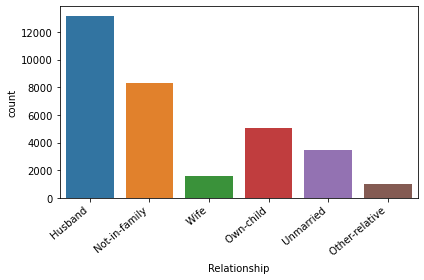

In [17]:
ax=sns.countplot(x='Relationship',data=ds)
print(ds['Relationship'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.tight_layout()

13193 are husband with maximum number of counts, 1568 are wives other relatives are 982,Nat-in - family,Own-child and Unmarried are approxmatly same

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


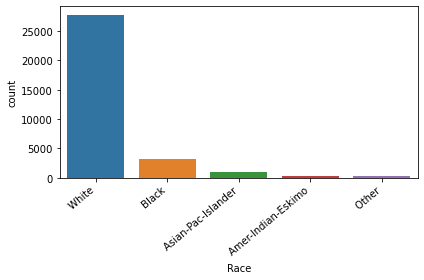

In [18]:
ax=sns.countplot(x='Race',data=ds)
print(ds['Race'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()

White are maximum in number 27815, other than that black. Asian-pac-Islander are almost equal and Amer-indiam-Eskino, and other are almost equal

 Male      21789
 Female    10771
Name: Sex, dtype: int64


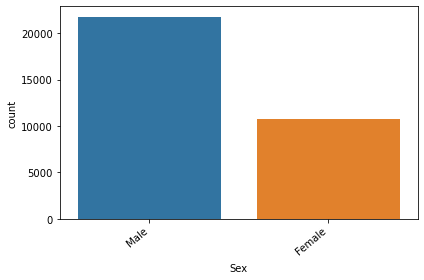

In [21]:
ax=sns.countplot(x='Sex',data=ds)
print(ds['Sex'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

The number of male is maximum that is 21789 and tne number of female is 10771

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

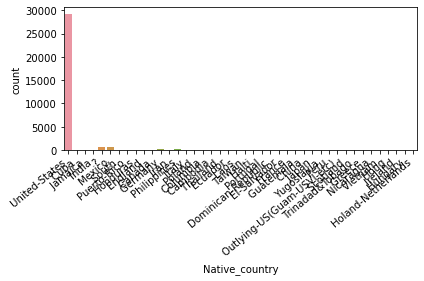

In [22]:
ax=sns.countplot(x='Native_country',data=ds)
print(ds['Native_country'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()

The people from United-States are maximum un number that is 29169, people from countries from other countries are not in noticable number indicating approximately same

# Exploratory DataAnalysis for numerical data

In [23]:
ds.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

<AxesSubplot:xlabel='Age', ylabel='Density'>

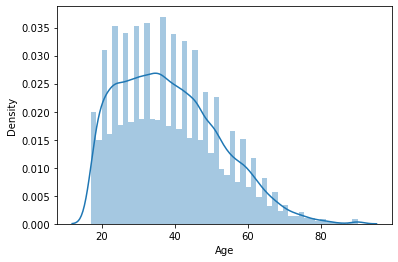

In [24]:
sns.distplot(ds['Age'])

Most ot the ages are between 18 to approx 65, and it is left skewed

In [25]:
#removing skewness
ds['Age']=np.log(ds['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

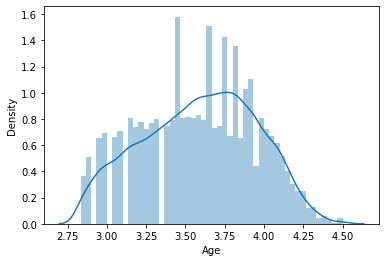

In [26]:
#plotting again
sns.distplot(ds['Age'])

Now it is somehow looking normally distributed

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

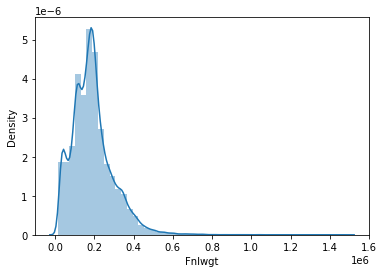

In [27]:
sns.distplot(ds['Fnlwgt'])

fnlwgt is ranges in between 0.0 to 0.6 and it is left skewed

In [28]:
#removind skewness
ds['Fnlwgt']=np.log(ds['Fnlwgt'])

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

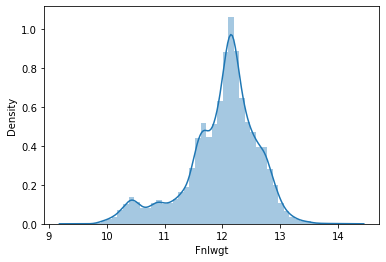

In [29]:
#again plotting
sns.distplot(ds['Fnlwgt'])

Now it is somehow looking normally distributed

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

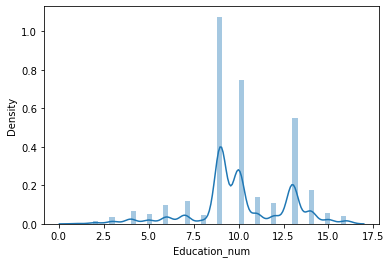

In [30]:
sns.distplot(ds['Education_num'])

Education_num is varring

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

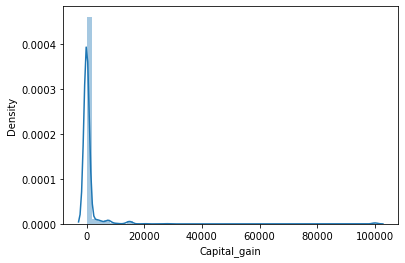

In [32]:
sns.distplot(ds['Capital_gain'])

Capital_gain is ranges from 0 to approx 20000 and it is left skewed and will remove skewness later.

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

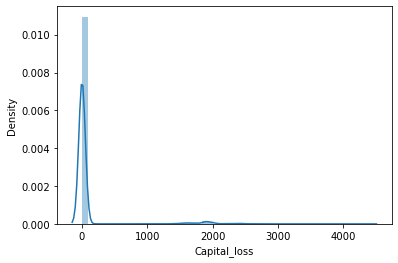

In [34]:
sns.distplot(ds['Capital_loss'])

Capital_lss ranges from 0 to somehow 2000 and it is left skewed

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

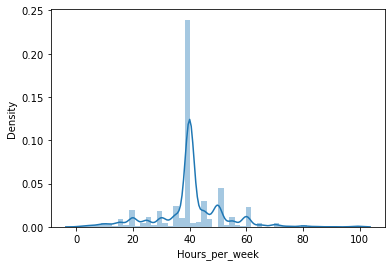

In [35]:
sns.distplot(ds['Hours_per_week'])

Hours_per_week ranges from 0 to 100 and its looking normally distributed

# Bivariate Analysis

<AxesSubplot:title={'center':'comparison between capital gain and capital rate'}, xlabel='Capital_gain', ylabel='Capital_loss'>

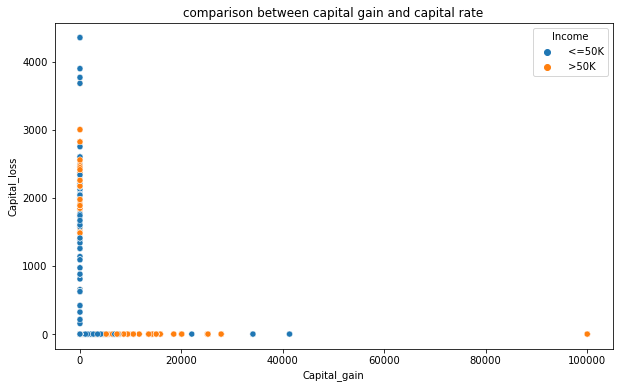

In [37]:
plt.figure(figsize=[10,6])
plt.title('comparison between capital gain and capital rate')
sns.scatterplot(ds['Capital_gain'],ds['Capital_loss'],hue=ds['Income'])

Scatterplot is showing Captital gain is more than capital loss

<AxesSubplot:xlabel='Income', ylabel='count'>

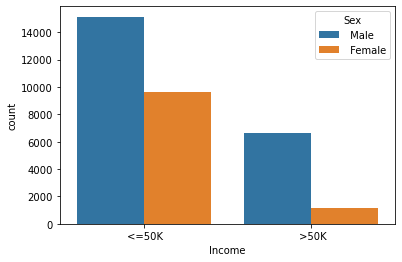

In [38]:
sns.countplot(ds['Income'],hue='Sex',data=ds)

male is more than female for 50k

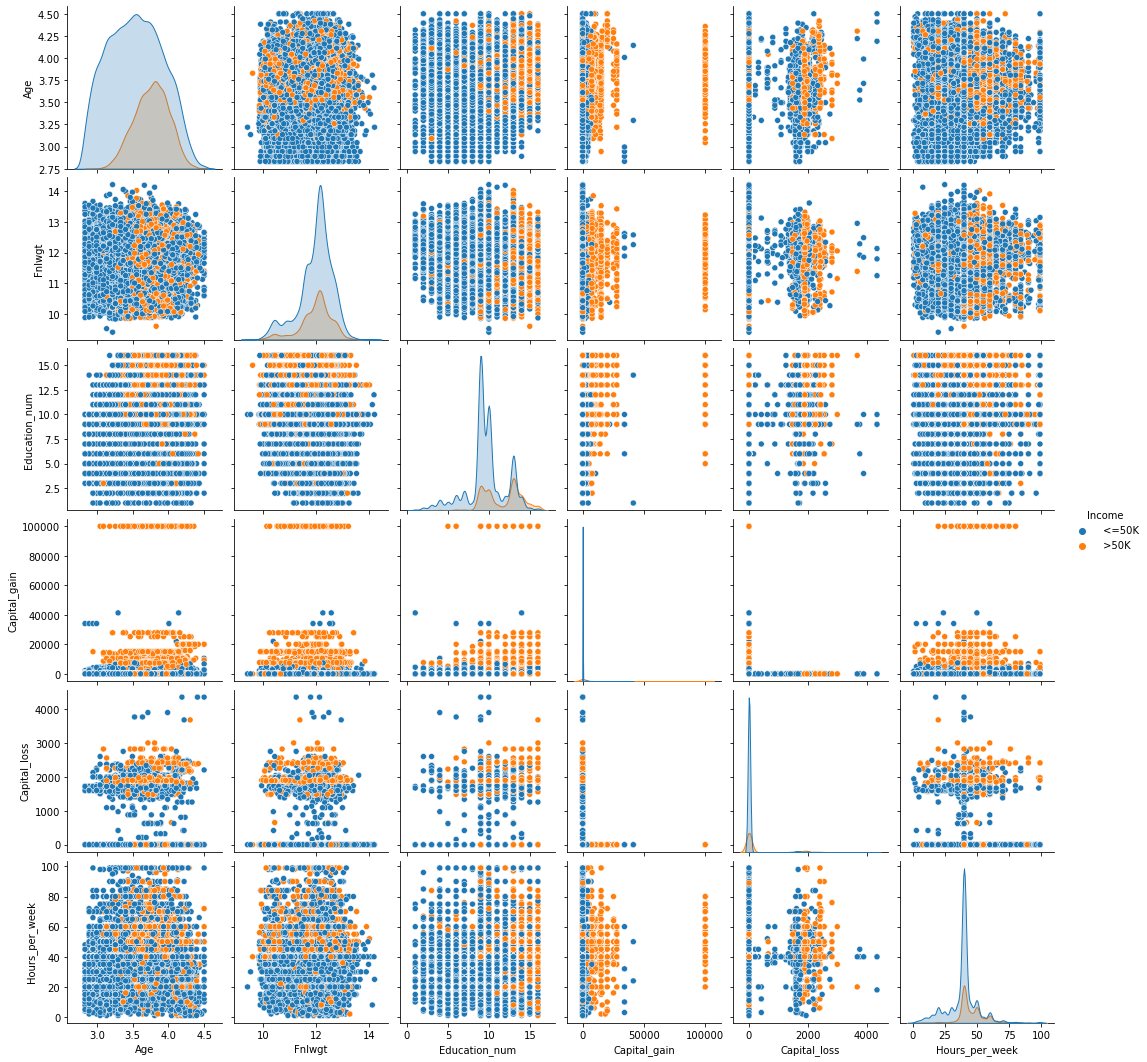

In [39]:
# pairplot
sns.pairplot(ds, hue='Income')

pairplot is showing comparison among each of the model

# converting string columns to Numerical data

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [42]:
for i in ds.columns:
    if ds[i].dtypes=='object':
        ds[i]=le.fit_transform(ds[i])

In [43]:
ds

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.912023,6,11.330336,9,13,2,4,0,4,1,0,0,13,39,0
1,3.637586,4,12.281393,11,9,0,6,1,4,1,0,0,40,39,0
2,3.970292,4,12.366153,1,7,2,6,0,2,1,0,0,40,39,0
3,3.332205,4,12.732011,9,13,2,10,5,2,0,0,0,40,5,0
4,3.610918,4,12.558777,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.295837,4,12.458006,7,12,2,13,5,4,0,0,0,38,39,0
32556,3.688879,4,11.947134,11,9,2,7,0,4,1,0,0,40,39,1
32557,4.060443,4,11.931044,11,9,6,1,4,4,0,0,0,40,39,0
32558,3.091042,4,12.213495,11,9,4,1,3,4,1,0,0,20,39,0


object datatypes columns has been converted into numerical columns.

# Checking Outliers

Age                   AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Workclass          AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Fnlwgt             AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Education          AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Education_num      AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
Marital_status     AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
Occupation         AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
Relationship         AxesSubplot(0.125,0.518913;0.0945122x0.16413)
Race              AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
Sex               AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
Capital_gain      AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
Capital_loss      AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
Hours_per_week    AxesSubplot(0.692073,0.518913;0.0945122x0.16413)
Native_country    AxesSubplot(0.805488,0.518913;0.0945122x0.16413)
Income               AxesSubplot(0.125,0.321957;0.0945122x0.16

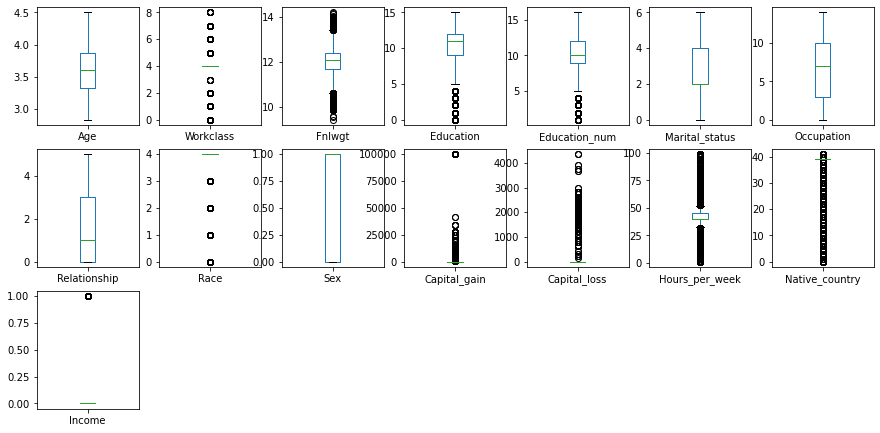

In [44]:
ds.plot(kind='box',subplots=True,layout=(4,7),figsize=(15,10))

# Workclass ,education and Native_country is the object data types columns with outlier and in object  data type we cant remove outlier due to chances of data loss
so,outlier are present in integer data type columns that is Education_num, Capital_loss,Hours_per_week

# Checking skewness


In [45]:
ds.skew()

Age               -0.131709
Workclass         -0.752280
Fnlwgt            -0.842578
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

olumns is in range between +.5 and -.5 are not skewed.

skewed columns are:

Workclass 

Fnlwgt

Education

Relationship 

Race

Sex

Capital_gain 

Capital_loss

Native_country

Income
and workclass .FNlwgt ,Education, Relationship .Race ,Sex, Native_country and Income is the object column so skewness wont be treated .

# Statistical summary

In [46]:
ds.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,3.589357,3.868796,11.983792,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,0.360384,1.455879,0.630741,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,2.833213,0.000000,9.416134,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.332205,4.000000,11.677011,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,3.610918,4.000000,12.091576,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,3.871201,4.000000,12.376045,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,4.499810,8.000000,14.210727,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


<AxesSubplot:>

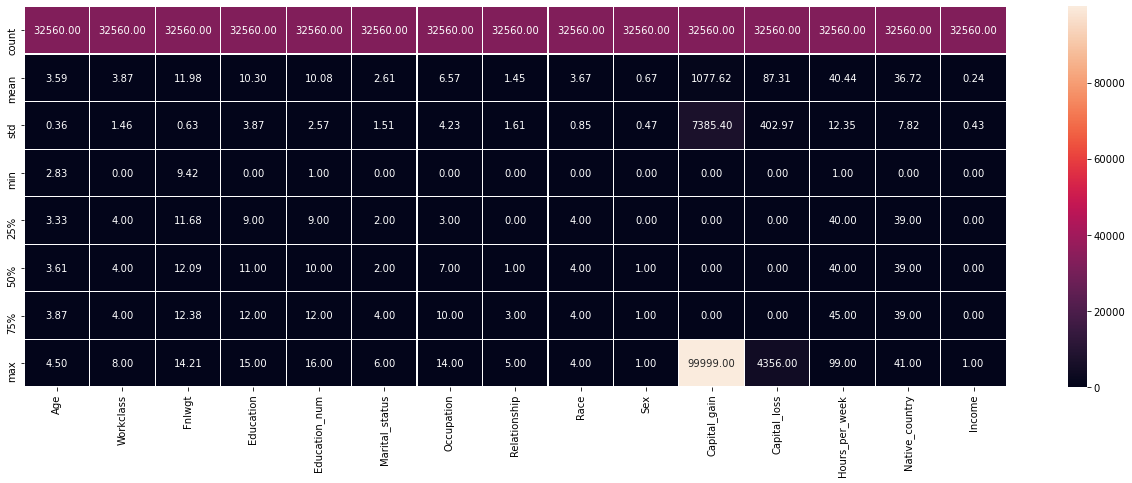

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(ds.describe(),annot=True,linewidths=0.1,fmt='0.2f')

Number of count is same in all the columns.
in capital gain and capital loss columns median is 0 and mean is very high means outliers are present
in capital gain and capital loss columns 75th percentile is 0 and max is very high

# correlation matrix

In [48]:
cor=ds.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.030558,-0.058228,0.010682,0.075086,-0.324965,-0.007277,-0.286549,0.021285,0.104628,0.081237,0.063278,0.140727,-0.007157,0.269109
Workclass,0.030558,1.000000,-0.014834,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.058228,-0.014834,1.000000,-0.028743,-0.037547,0.025856,0.003209,0.011113,-0.009088,0.019362,0.003569,-0.005092,-0.024335,-0.059969,-0.001393
Education,0.010682,0.023537,-0.028743,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.075086,0.052015,-0.037547,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.324965,-0.064798,0.025856,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.007277,0.255004,0.003209,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.286549,-0.090449,0.011113,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.021285,0.049720,-0.009088,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.104628,0.095942,0.019362,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

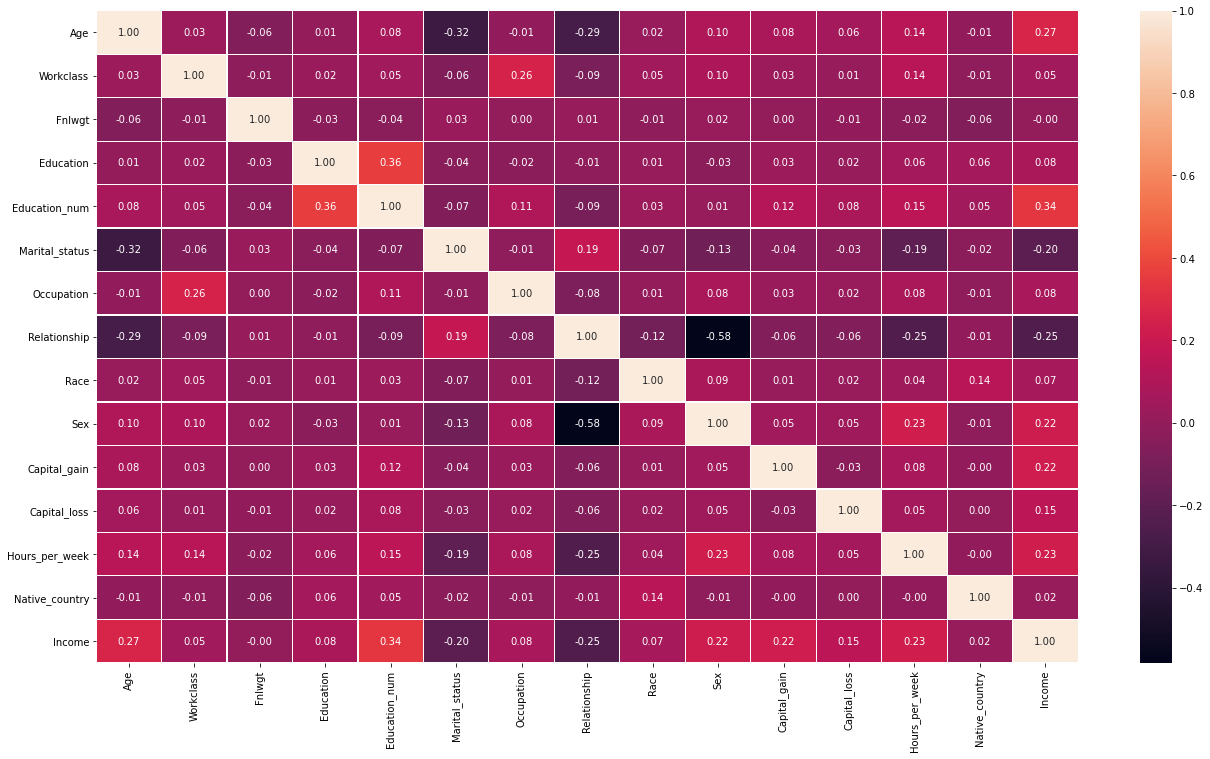

In [49]:
plt.figure(figsize=(22,12))
sns.heatmap(ds.corr(),annot=True,linewidths=0.1,fmt='0.2f')


Age and Education_num is somehow positively correlated with the target column income , and no other column is showing any good correlation with target column
sex is negativly correlated with Relationship.
Education is somehow positivly correlated with /education_num.


# Eilling?values

In [51]:
ds['Workclass']=ds['Workclass'].replace('?','Private')
ds['Occupation']=ds['Occupation'].replace('?','prof-specialty')
ds['Native_country']=ds['Native_country'].replace('?','United-States')

In [52]:
ds

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.912023,6,11.330336,9,13,2,4,0,4,1,0,0,13,39,0
1,3.637586,4,12.281393,11,9,0,6,1,4,1,0,0,40,39,0
2,3.970292,4,12.366153,1,7,2,6,0,2,1,0,0,40,39,0
3,3.332205,4,12.732011,9,13,2,10,5,2,0,0,0,40,5,0
4,3.610918,4,12.558777,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.295837,4,12.458006,7,12,2,13,5,4,0,0,0,38,39,0
32556,3.688879,4,11.947134,11,9,2,7,0,4,1,0,0,40,39,1
32557,4.060443,4,11.931044,11,9,6,1,4,4,0,0,0,40,39,0
32558,3.091042,4,12.213495,11,9,4,1,3,4,1,0,0,20,39,0


In [53]:
ds.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Removing Outlier and skewness

In [54]:
ds.shape

(32560, 15)

In [55]:
from scipy.stats import zscore

In [56]:
z=np.abs(zscore(ds))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

In [59]:
dataframe=ds[(z<3).all(axis=1)]
dataframe

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.912023,6,11.330336,9,13,2,4,0,4,1,0,0,13,39,0
1,3.637586,4,12.281393,11,9,0,6,1,4,1,0,0,40,39,0
2,3.970292,4,12.366153,1,7,2,6,0,2,1,0,0,40,39,0
4,3.610918,4,12.558777,12,14,2,4,5,4,0,0,0,40,39,0
5,3.891820,4,11.984097,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.295837,4,12.458006,7,12,2,13,5,4,0,0,0,38,39,0
32556,3.688879,4,11.947134,11,9,2,7,0,4,1,0,0,40,39,1
32557,4.060443,4,11.931044,11,9,6,1,4,4,0,0,0,40,39,0
32558,3.091042,4,12.213495,11,9,4,1,3,4,1,0,0,20,39,0


In [60]:
ds.shape

(32560, 15)

In [61]:
dataframe.shape

(27688, 15)

In [62]:
dataframe.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

4872 rows has been removed as a outlier

In [63]:
#checkig skewness
dataframe.skew()

Age               -0.118378
Workclass         -0.741752
Fnlwgt            -0.807884
Education         -0.955367
Education_num     -0.148775
Marital_status    -0.040698
Occupation         0.132987
Relationship       0.750075
Race              -2.555541
Sex               -0.686102
Capital_gain       4.941962
Capital_loss      29.470795
Hours_per_week    -0.364846
Native_country    -5.396104
Income             1.327831
dtype: float64

In [65]:
dataframe['Capital_loss']=np.cbrt(dataframe['Capital_loss'])

In [66]:
dataframe.skew()

Age               -0.118378
Workclass         -0.741752
Fnlwgt            -0.807884
Education         -0.955367
Education_num     -0.148775
Marital_status    -0.040698
Occupation         0.132987
Relationship       0.750075
Race              -2.555541
Sex               -0.686102
Capital_gain       4.941962
Capital_loss      25.588629
Hours_per_week    -0.364846
Native_country    -5.396104
Income             1.327831
dtype: float64

Some of the skewness has been removed during outlier,tried reomving more skewness but skewness but loosing the data

# Seprating the columns into x and y

In [69]:
x=dataframe.drop('Income',axis=1)
y=dataframe['Income']

In [70]:
x.shape

(27688, 14)

In [71]:
y.shape

(27688,)

# Lets bring all feature to a common scale

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(dataframe)
x=pd.DataFrame(x,columns=dataframe.columns)

# Handling class Imbalance problem by oversampling the minority class

In [95]:
!pip install imblearn

In [99]:
#In Target column Differece is more between above50k and less than 50k

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(x,y)

In [100]:
y_over.value_counts()

0    21501
1    21501
Name: Income, dtype: int64

# Train Test Split

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.22,random_state=47)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21596, 15)
(6092, 15)
(21596,)
(6092,)


# Model Building

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [85]:
#LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

1.0
[[4774    0]
 [   0 1318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      6092
   macro avg       1.00      1.00      1.00      6092
weighted avg       1.00      1.00      1.00      6092



In [86]:
#Logistic Regression cross validation
scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 1.0


Accuracy score is 100% and cv score is 100% Logistic Regression

In [87]:
#AUC ROC curve Logistic Regression
lr.fit(x_train,y_train)
y_pred_proba=lr.predict_proba(x_test)[:,1]

In [88]:
y_pred_proba

array([1.54417584e-04, 8.93585826e-05, 9.99476016e-01, ...,
       1.47432845e-04, 9.99505218e-01, 6.77088413e-05])

In [89]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
fpr
tpr

array([0.00000000e+00, 7.58725341e-04, 1.00000000e+00, 1.00000000e+00])

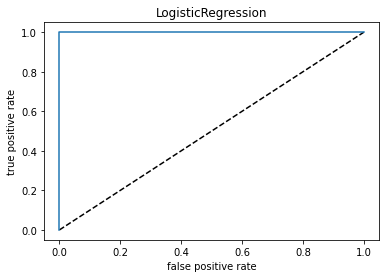

In [90]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('LogisticRegression')
plt.show()

In [92]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

1.0


Auc_score of Logistic Regression is 100%

In [94]:
#Adabosstclasssifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

1.0
[[4774    0]
 [   0 1318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      6092
   macro avg       1.00      1.00      1.00      6092
weighted avg       1.00      1.00      1.00      6092



In [101]:
#for adaBoost classifier cross validation
scr=cross_val_score(ad,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 1.0


accuracy acore is 100% and cv score is 100% of adaboost classifier

In [105]:
#auc Roc curve adaboost classifier
ad.fit(x_train,y_train)
y_pred_prob=ad.predict_proba(x_test)[:,1]

In [106]:
y_pred_prob

array([2.22044605e-16, 2.22044605e-16, 1.00000000e+00, ...,
       2.22044605e-16, 1.00000000e+00, 2.22044605e-16])

In [109]:
fpr,tpr ,thresholds=roc_curve(y_test,y_pred_proba)
fpr
tpr

array([0.00000000e+00, 7.58725341e-04, 1.00000000e+00, 1.00000000e+00])

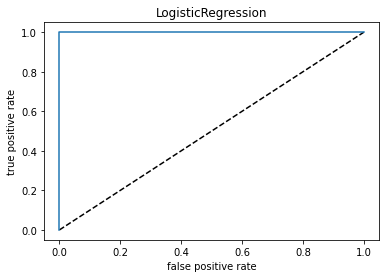

In [111]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('LogisticRegression')
plt.show()

In [112]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

1.0


auc_score of logistic Regrssion is 100%


In [114]:
#Adaboostclassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

1.0
[[4774    0]
 [   0 1318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      6092
   macro avg       1.00      1.00      1.00      6092
weighted avg       1.00      1.00      1.00      6092



In [116]:
#For adaboostclassifier cross validation
scr=cross_val_score(ad,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 1.0


accuracy score is 100% and cv score is 100% of adaboost classifier

In [117]:
##auc roc curve adaboost classifier
ad.fit(x_train,y_train)
y_pred_prob=ad.predict_proba(x_test)[:,1]

In [118]:
y_pred_prob

array([2.22044605e-16, 2.22044605e-16, 1.00000000e+00, ...,
       2.22044605e-16, 1.00000000e+00, 2.22044605e-16])

<function matplotlib.pyplot.show(close=None, block=None)>

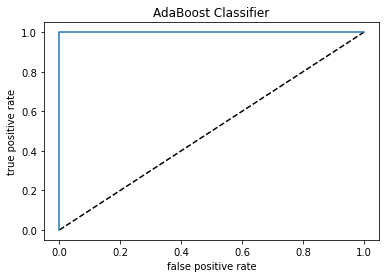

In [119]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AdaBoost Classifier')
plt.show

auc_acore of adaboost claasifier is 100%

In [120]:
#decisicontreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[4774    0]
 [   0 1318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      6092
   macro avg       1.00      1.00      1.00      6092
weighted avg       1.00      1.00      1.00      6092



In [121]:
#for DecisionTreeClassifier cross validation
scr=cross_val_score(dt,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 1.0


accuracy score is 100% and cross validation score is 100% for Decision Tree classifier

In [122]:
#auc roc curve decision tree classifier
dt.fit(x_train,y_train)
y_pred_prob=dt.predict_proba(x_test)[:,1]

In [123]:
y_pred_prob

array([0., 0., 1., ..., 0., 1., 0.])

In [124]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0., 1., 1.])

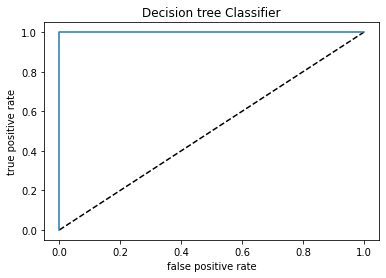

In [125]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision TreeClassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decision tree Classifier')
plt.show()

In [127]:
auc_score=roc_auc_score(y_test,dt.predict(x_test))
print(auc_score)

1.0


auc_score of decision Tree classifier is 100%

In [129]:
# Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[4774    0]
 [   0 1318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      6092
   macro avg       1.00      1.00      1.00      6092
weighted avg       1.00      1.00      1.00      6092



In [130]:
#random Forest corss validation
svr=cross_val_score(rf,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 1.0


accuracy score is 100% and cv score is 100% of Random forest Classifier

In [131]:
#auc roc curve random forest classifier
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]

In [132]:
y_pred_prob

array([0.  , 0.  , 1.  , ..., 0.01, 0.93, 0.  ])

In [133]:
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.        , 0.4339909 , 0.64643399, 0.76783005, 0.83763278,
       0.88543247, 0.92640364, 0.94461305, 0.95827011, 0.97268589,
       0.97875569, 0.98710167, 0.99013657, 0.99544765, 0.9969651 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

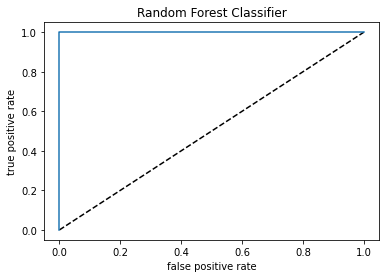

In [134]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [137]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print(auc_score)

1.0


random forest classifier i s100%

In [139]:
#gaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

1.0
[[4774    0]
 [   0 1318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      6092
   macro avg       1.00      1.00      1.00      6092
weighted avg       1.00      1.00      1.00      6092



In [140]:
#for Guassian NB
scr=cross_val_score(gnb,x,y,cv=5)
print('cross validation score',scr.mean())


cross validation score 1.0


accuracy score 100% cv is 100% for guassianNB

In [142]:
#auc roc curve gaussianb
gnb.fit(x_train,y_train)
y_pred_prob=gnb.predict_proba(x_test)[:,1]

In [143]:
y_pred_prob

array([0., 0., 1., ..., 0., 1., 0.])

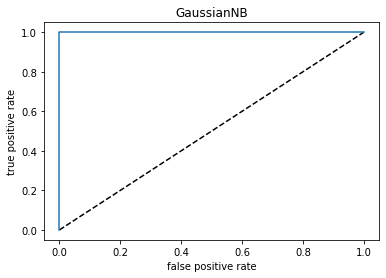

In [145]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('GaussianNB')
plt.show()

In [146]:
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
print(auc_score)

1.0


auc_score for gaussianNB is 100%

In [147]:
#svc
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9998358502954695
[[4774    0]
 [   1 1317]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      6092
   macro avg       1.00      1.00      1.00      6092
weighted avg       1.00      1.00      1.00      6092



In [148]:
#svc corss validation
scr=cross_val_score(svc,x,y,cv=5)
print('cross validation score',scr.mean())


cross validation score 0.9998916576381365


accuracy score i s99% and cv= 995 of svc

# Hyper parameter tunning of model

In [151]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier(max_depth=10,random_state=0)
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                   scoring='accuracy',
                   cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
1.0


if criterion will be gini ,then we will gel almost 100% accuracy after hyper parameter tunning

In [153]:
final_mod=RandomForestClassifier(criterion='gini')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


after Hyper parameter tunning the accuracy is 100%

# saving the model


In [154]:
import pickle
filename='census_income.pkl'
pickle.dump(rf,open(filename,'wb'))

# coclusion

Above predictions from the model , we can say that our model is performing extremly well, we are getting 100% accuracy .

With the help of MODEL , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on target columns..

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.

​